# 0. 라이브러리 및 데이터 불러오기

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df = pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# 1. EDA 실행

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

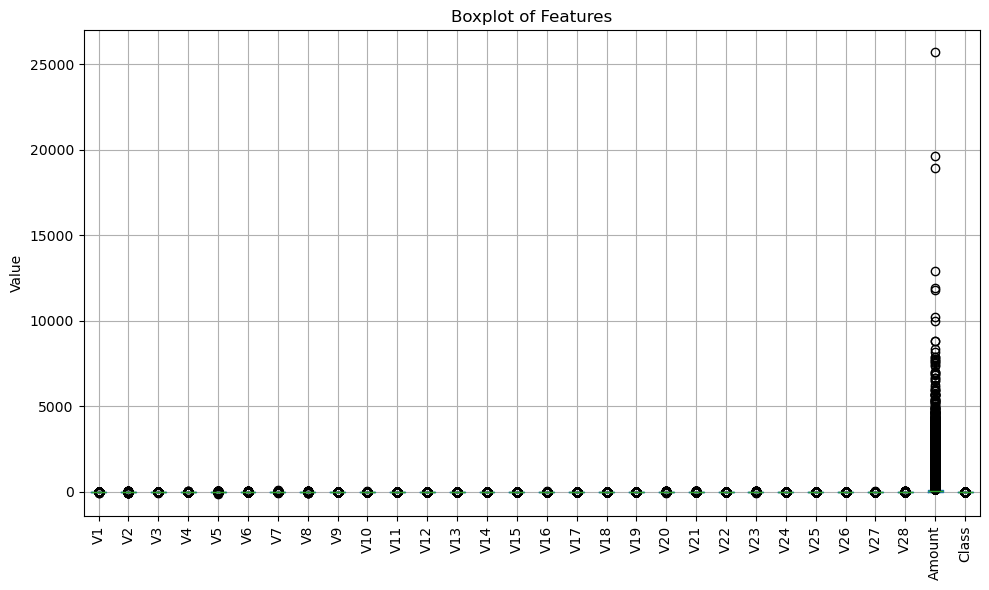

In [16]:
# 1. 데이터의 기본 정보
print(df.info())
print("--------------------")

# 2. 결측치 확인
print(df.isnull().sum())
print("--------------------")

# 3. 데이터의 통계적 요약
print(df.describe())
print("--------------------")

# 4. 데이터의 분포 시각화
plt.figure(figsize=(10, 6))
df.drop('Time', axis = 1).boxplot()
plt.xticks(rotation=90)
plt.title("Boxplot of Features")
plt.ylabel("Value")
plt.tight_layout()
plt.show()

### 1. 전처리

1-1. 수치 데이터 변형

1-2. 결측치 제거

1-3. 모델 간의 중요도 판별 -> 정규화


Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64


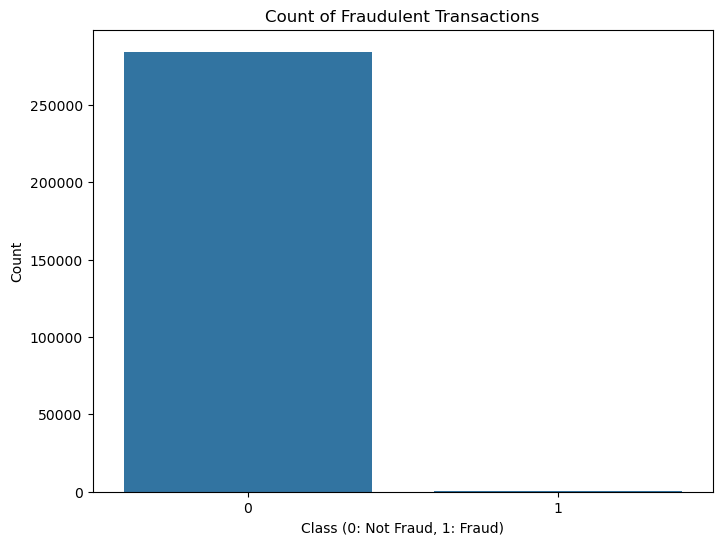

In [17]:
print(df['Class'].value_counts(normalize=True))

plt.figure(figsize=(8, 6))
sns.countplot(x = 'Class', data = df)
plt.title("Count of Fraudulent Transactions")
plt.xlabel("Class (0: Not Fraud, 1: Fraud)")
plt.ylabel("Count")
plt.show()

모델은 0만 출력해도 성능이 99.9%

따라서 1에 대한 0.1%를 잘 맞추는지를 평가해야 한다. -> Recall

4. 클래스 분포 분석 결과

- 매우 심각한 데이터 불균형 존재
- 데이터 전처리 방향 : SMOTE, Undersampling 고려
- 모델 : 앙상블 기반 모델 고려

5. 거래 금액 분포에 따른 데이터 분석

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64


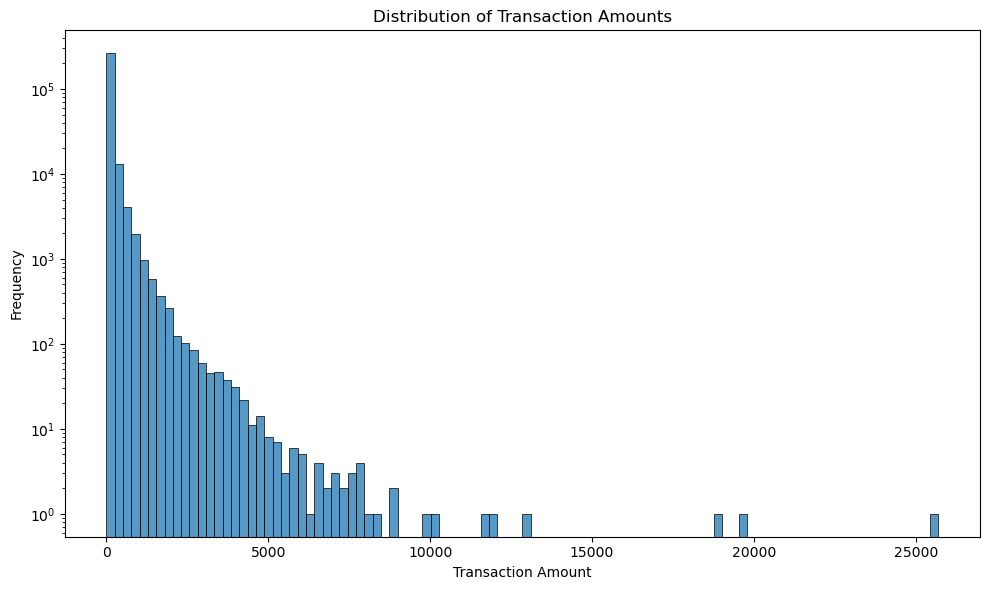

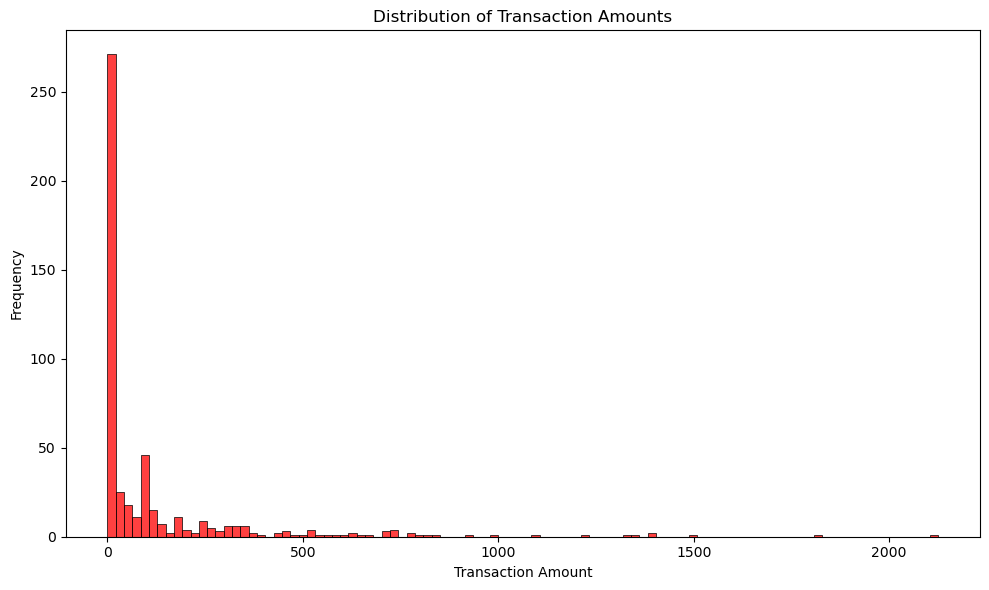

In [18]:
print(df['Amount'].describe())
print(df[df['Class'] == 1]['Amount'].describe())

plt.figure(figsize=(10, 6))
sns.histplot(df['Amount'], bins=100)
plt.title("Distribution of Transaction Amounts")
plt.xlabel("Transaction Amount")
plt.ylabel("Frequency")
plt.yscale('log')
plt.tight_layout()
plt.show()

# 이상 거래만 따로 보기
plt.figure(figsize=(10, 6))
sns.histplot(df[df['Class'] == 1]['Amount'], bins=100, color='red')
plt.title("Distribution of Transaction Amounts")
plt.xlabel("Transaction Amount")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

정상거래 IQR 범위 : 5.65 ~ 77.05
이상거래 IQR 범위 : 1.00 ~ 105.89
겹치는 범위 : 5.65 ~ 77.05
겹치는 범위 길이 : 71.40
겹치는 범위의 비율 : 0.68


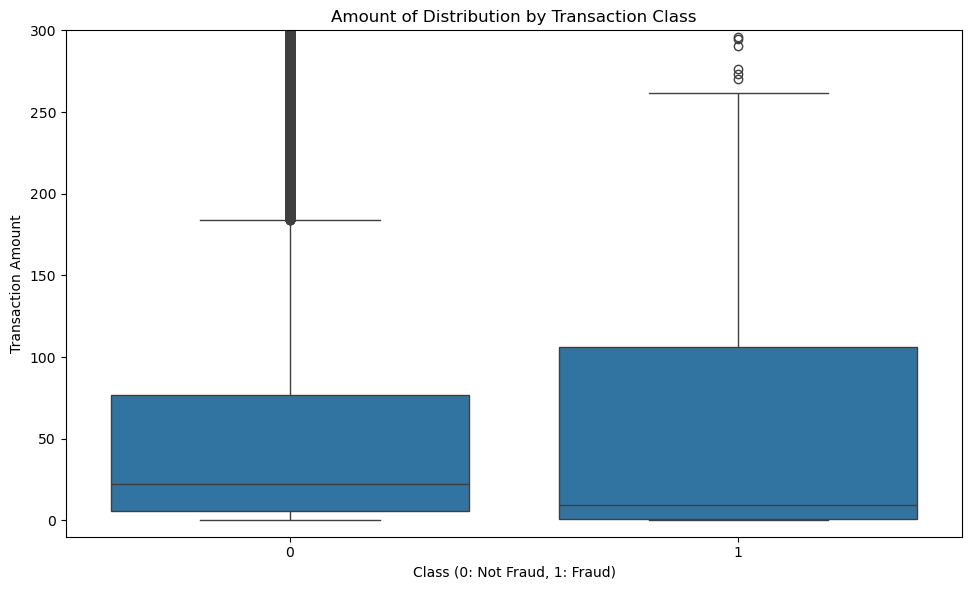

In [19]:
# 정상 거래와 이상 거래의 금액 분포 비교
# IQR 계산
normal_q1 = df[df['Class'] == 0]['Amount'].quantile(0.25)
normal_q3 = df[df['Class'] == 0]['Amount'].quantile(0.75)
normal_iqr = normal_q3 - normal_q1

fraud_q1 = df[df['Class'] == 1]['Amount'].quantile(0.25)
fraud_q3 = df[df['Class'] == 1]['Amount'].quantile(0.75)
fraud_iqr = fraud_q3 - fraud_q1

# IQR 겹치는 범위
overlap_start = max(normal_q1, fraud_q1)
overlap_end = min(normal_q3, fraud_q3)
overlap_range = overlap_end - overlap_start

print(f"정상거래 IQR 범위 : {normal_q1:.2f} ~ {normal_q3:.2f}")
print(f"이상거래 IQR 범위 : {fraud_q1:.2f} ~ {fraud_q3:.2f}")
print(f"겹치는 범위 : {overlap_start:.2f} ~ {overlap_end:.2f}")
print(f"겹치는 범위 길이 : {overlap_range:.2f}")
print(f"겹치는 범위의 비율 : {overlap_range/104.89:.2f}")

plt.figure(figsize=(10, 6))
sns.boxplot(x='Class', y='Amount', data=df)
plt.title("Amount of Distribution by Transaction Class")
plt.xlabel("Class (0: Not Fraud, 1: Fraud)")
plt.ylabel("Transaction Amount")
plt.tight_layout()
plt.ylim(-10, 300)
plt.show()

6. 시간에 따른 이상거래 분포

Time Statistics
count    284807.000000
mean         26.337183
std          13.191152
min           0.000000
25%          15.055972
50%          23.525556
75%          38.700139
max          47.997778
Name: Time, dtype: float64


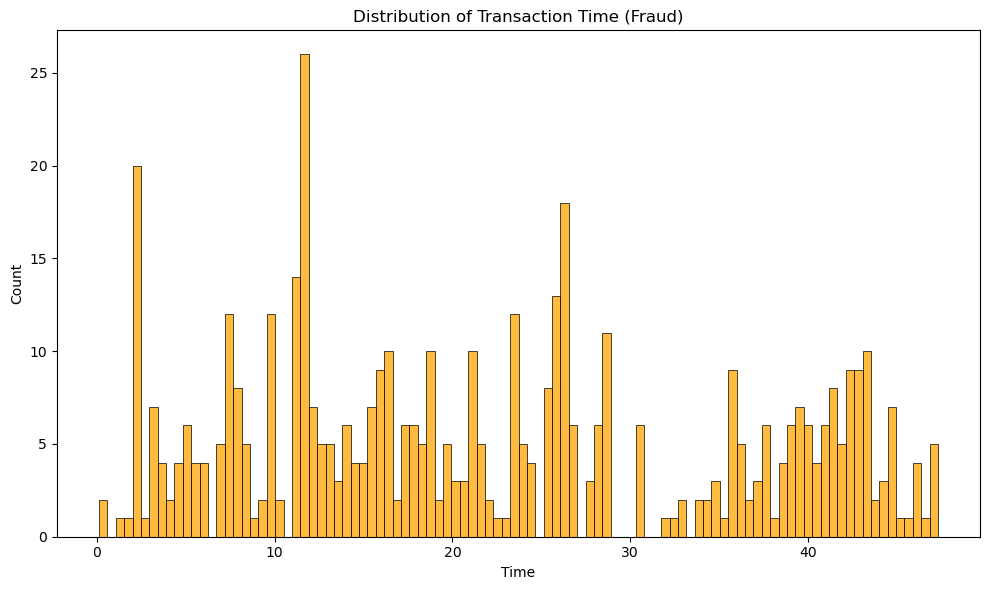

In [6]:
print("Time Statistics")
print((df['Time'] / 3600).describe())

plt.figure(figsize=(10, 6))
sns.histplot(df[df['Class'] == 1]['Time'] / 3600, bins=100, color = 'orange')
plt.title("Distribution of Transaction Time (Fraud)")
plt.xlabel("Time")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

9. 이상치 분석

In [20]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)

    IQR = Q3 - Q1
    
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower) | (data[column] > upper)]

    return outliers, outliers.shape[0], lower, upper

outliers, amount_outliers, amt_low, amt_high = detect_outliers_iqr(df, 'Amount')

print(f"Outliers in Amount : {amount_outliers} (IQR range : {amt_low:.2f} ~ {amt_high:.2f})")

# outliers 시각화
outliers_classes = outliers['Class'].value_counts()
total_classes = df['Class'].value_counts()
outliers_classes = outliers_classes / total_classes
print("Outliers Class Distribution : ")
print(outliers_classes)

Outliers in Amount : 31904 (IQR range : -101.75 ~ 184.51)
Outliers Class Distribution : 
Class
0    0.111893
1    0.184959
Name: count, dtype: float64


V1 ~ V28 의 상관관계 분석

Top 10 Features Correlated with Class:
Class    1.000000
V11      0.154876
V4       0.133447
V2       0.091289
V21      0.040413
V19      0.034783
V20      0.020090
V8       0.019875
V27      0.017580
V28      0.009536
Name: Class, dtype: float64


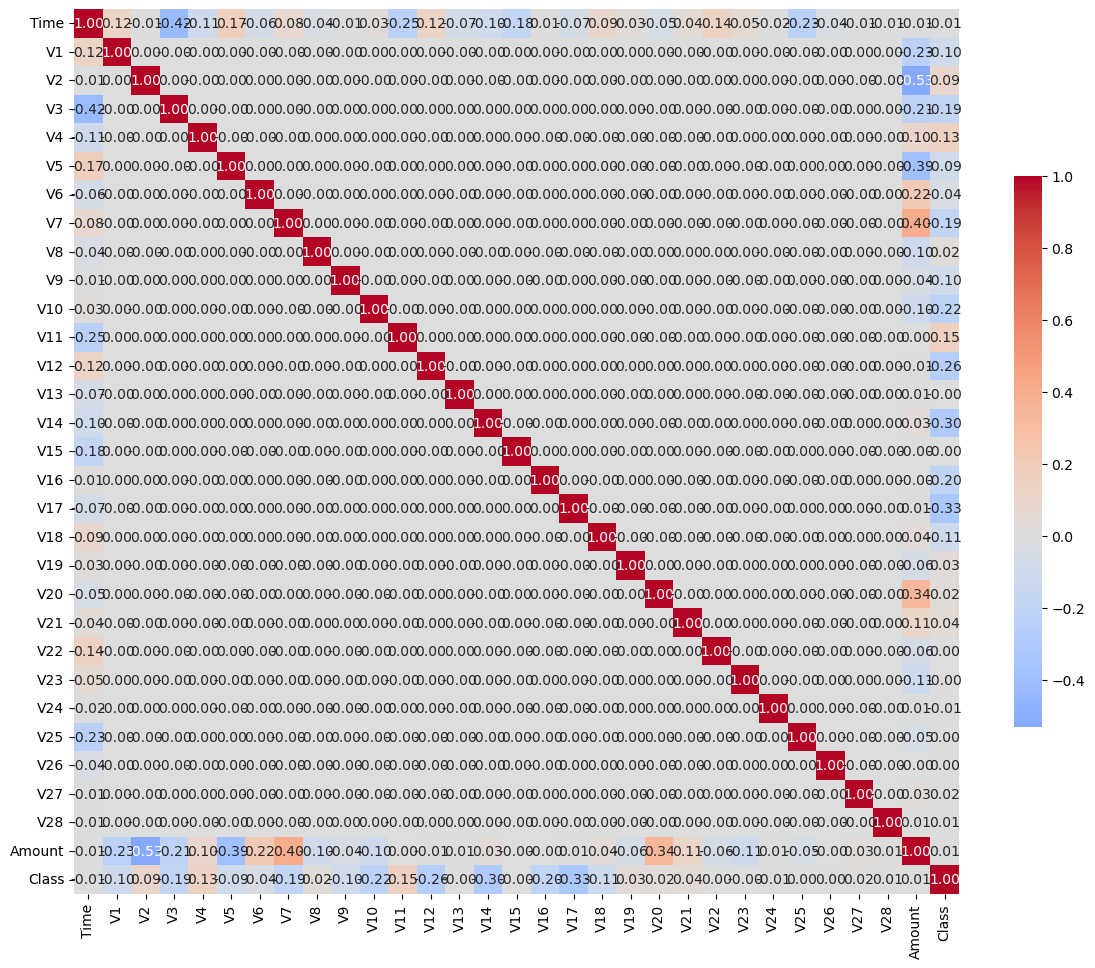

In [21]:
corr_matrix = df.corr(numeric_only=True)

class_corr = corr_matrix['Class'].sort_values(ascending=False)
print("Top 10 Features Correlated with Class:")
print(class_corr.head(10))

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', center = 0, square = True, cbar_kws={"shrink": 0.6})
plt.title("")
plt.tight_layout()
plt.show()

요약
1. 스케일링 필요
2. 클래스 불균형 처리 필요
3. 이상치는 보존
4. 모델 : 비선형 모델 (트리 기반 모델 : RandomForest, XGBoost)

# 2. 전처리 실행

In [22]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

df = pd.read_csv("creditcard.csv")

scaler = StandardScaler()
df[['scaled_time', 'scaled_amount']] = scaler.fit_transform(df[['Time', 'Amount']])

df.drop(['Time', 'Amount'], axis = 1, inplace = True)

scaled_columns = ['scaled_time', 'scaled_amount']
other_columns = [col for col in df.columns if col not in scaled_columns]
df = df[scaled_columns + other_columns]

X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Train set shape:", X_train.shape)
print("Test set shape:", X_test.shape)
print("Fraud ratio in train set:", y_train.mean())
print("Fraud ratio in test set:", y_test.mean())

Train set shape: (227845, 30)
Test set shape: (56962, 30)
Fraud ratio in train set: 0.001729245759178389
Fraud ratio in test set: 0.0017204452090867595


# 3. 모델링 및 평가

In [23]:
X = df.iloc[:, 1:-2] # 마지막 column 제외 : data / time 제외
y = df.iloc[:, -1] # 마지막 column : target

In [24]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = XGBClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, log_loss

print(f"Accuracy  : {accuracy_score(y_test, y_pred) * 100} %")
print(f"Precision : {precision_score(y_test, y_pred) * 100} %")
print(f"Recall    : {recall_score(y_test, y_pred) * 100} %")
print(f"f1 score  : {f1_score(y_test, y_pred) * 100} %")
print(f"roc_curve : {roc_auc_score(y_test, y_pred) * 100} %")
print(f"log_loss  : {log_loss(y_test, y_pred)}")

Accuracy  : 99.95962220427653 %
Precision : 96.29629629629629 %
Recall    : 79.59183673469387 %
f1 score  : 87.15083798882681 %
roc_curve : 89.79328049452758 %
log_loss  : 0.014553632736731633


불균형 데이터에서 **over sampling**
>sampling : 데이터 뽑는거

기존의 데이터에서 랜덤 추출 -> 하나의 데이터로 인정 (중복데이터 발생), feature 개수를 맞춰줌

### SMOTE

위의 방식대로 over sampling을 할 경우, feature 개수는 맞출 수 있으나 종류는 변함 없음 -> 올바른 sampling이 아님

KNN으로 feature의 수를 늘림 -> SMOTE